In [ ]:
# Recommendor systems

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import NearestNeighbors

In [2]:
train_data = pd.read_csv("train.csv")

In [3]:
train_data.head()

,user_id,sex,age,occupation,movie title,movie_id,rating,Musical,unknown,Action,...,Fantasy,Film-Noir,Horror,Mystery,Romance,Thriller,War,Sci-Fi,Western,unix_timestamp
0,173,M,56,other,Evita (1996),289,4,0,0,1,...,0,0,0,0,1,0,0,0,0,877556988
1,607,F,49,healthcare,Raiders of the Lost Ark (1981),174,3,0,0,0,...,0,0,0,0,1,1,0,0,0,883879516
2,600,M,34,programmer,Natural Born Killers (1994),53,4,0,0,0,...,0,0,0,0,0,0,0,0,0,888452563
3,104,M,27,student,Beverly Hills Ninja (1997),456,3,0,0,0,...,0,0,0,0,0,0,0,0,0,888465853
4,486,M,39,educator,"Frighteners, The (1996)",123,3,0,0,0,...,0,0,0,0,1,0,0,0,0,879875278


In [4]:
train_exp = train_data

In [5]:
train_exp['male'] = pd.get_dummies(train_exp.sex,drop_first=True)

In [6]:
train_exp.drop(['occupation','sex'],axis = 1,inplace=True)

In [7]:
train_exp.drop(['movie title'],inplace = True,axis = 1)

In [8]:
train_exp

,user_id,age,movie_id,rating,Musical,unknown,Action,Adventure,Children's,Fantasy,Film-Noir,Horror,Mystery,Romance,Thriller,War,Sci-Fi,Western,unix_timestamp,male
0,173,56,289,4,0,0,1,1,0,0,0,0,0,1,0,0,0,0,877556988,1
1,607,49,174,3,0,0,0,0,0,0,0,0,0,1,1,0,0,0,883879516,0
2,600,34,53,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,888452563,1
3,104,27,456,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,888465853,1
4,486,39,123,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,879875278,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,683,42,301,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,893283728,1
79996,191,33,750,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,891560253,1
79997,625,27,169,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,891263665,1
79998,128,24,402,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,879969136,0


In [10]:
# from sklearn.model_selection import train_test_split

In [9]:
# X= train_exp.iloc[:,1:].drop(['movie_id'],axis=1)
# y= train_exp['movie_id']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [10]:
# nn = NearestNeighbors(n_neighbors=5)
# nn.fit(X_train,y_train)

In [11]:
# print(nn.kneighbors)

In [12]:
train_exp.head()

,user_id,age,movie_id,rating,Musical,unknown,Action,Adventure,Children's,Fantasy,Film-Noir,Horror,Mystery,Romance,Thriller,War,Sci-Fi,Western,unix_timestamp,male
0,173,56,289,4,0,0,1,1,0,0,0,0,0,1,0,0,0,0,877556988,1
1,607,49,174,3,0,0,0,0,0,0,0,0,0,1,1,0,0,0,883879516,0
2,600,34,53,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,888452563,1
3,104,27,456,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,888465853,1
4,486,39,123,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,879875278,1


In [13]:
ratings = pd.DataFrame(train_exp.groupby('movie_id')['rating'].mean())
ratings['num of ratings'] = pd.DataFrame(train_exp.groupby('movie_id')['rating'].count())

In [14]:
ratings.head()

,rating,num of ratings
movie_id,,
1,3.908012,337
2,3.257143,105
3,3.069444,72
4,3.593939,165
5,3.310811,74


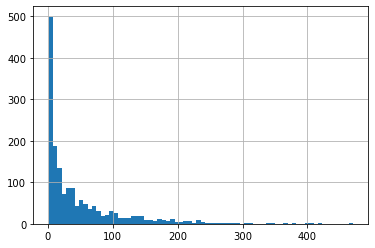

In [15]:
ratings['num of ratings'].hist(bins=70)

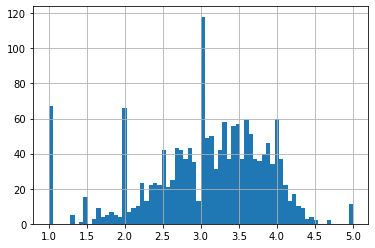

In [16]:
ratings['rating'].hist(bins=70)

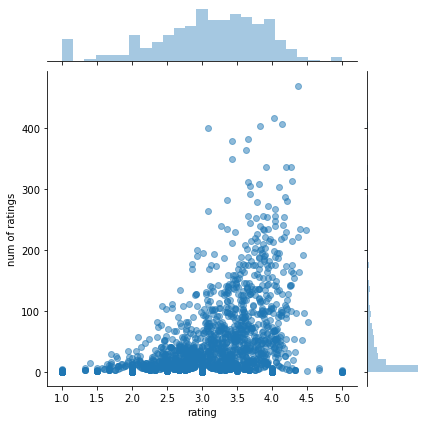

In [17]:
sns.jointplot(x='rating',y='num of ratings',data = ratings,alpha=0.5)

In [18]:
train_exp.head()

,user_id,age,movie_id,rating,Musical,unknown,Action,Adventure,Children's,Fantasy,Film-Noir,Horror,Mystery,Romance,Thriller,War,Sci-Fi,Western,unix_timestamp,male
0,173,56,289,4,0,0,1,1,0,0,0,0,0,1,0,0,0,0,877556988,1
1,607,49,174,3,0,0,0,0,0,0,0,0,0,1,1,0,0,0,883879516,0
2,600,34,53,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,888452563,1
3,104,27,456,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,888465853,1
4,486,39,123,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,879875278,1


In [19]:
df = train_exp[['user_id','movie_id','rating','unix_timestamp']]

In [20]:
df.head()

,user_id,movie_id,rating,unix_timestamp
0,173,289,4,877556988
1,607,174,3,883879516
2,600,53,4,888452563
3,104,456,3,888465853
4,486,123,3,879875278


In [21]:
moviemat = df.pivot_table(index='user_id',columns='movie_id',values='rating')

In [22]:
moviemat

movie_id,1,2,3,4,5,6,7,8,9,10,...,1669,1670,1671,1672,1674,1677,1678,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# movie_1_user_rating = moviemat[1]
# similar_to_movie1 = moviemat.corrwith(movie_1_user_rating)
# corr_movie1 = pd.DataFrame(similar_to_movie1,columns=['Correlation'])
# corr_movie1.dropna(inplace = True)
# corr_movie1.sort_values('Correlation',ascending=False).head(10)
# corr_movie1 = corr_movie1.join(ratings['num of ratings'])
# g = corr_movie1[corr_movie1['num of ratings']>100].sort_values('Correlation',ascending=False).head()
# s = tuple(g.index)
# final_list= []
# final_list.append(s)

In [24]:
# final_list= [()]
# for i in moviemat.columns:
#     for g  in  final_list:
#         if i in g:
#             continue
#         else:
#             movie_1_user_rating = moviemat[1]
#             similar_to_movie1 = moviemat.corrwith(movie_1_user_rating)
#             corr_movie1 = pd.DataFrame(similar_to_movie1,columns=['Correlation'])
#             corr_movie1.dropna(inplace = True)
#             corr_movie1.sort_values('Correlation',ascending=False).head(10)
#             corr_movie1 = corr_movie1.join(ratings['num of ratings'])
#             g  = corr_movie1[corr_movie1['num of ratings']>100].sort_values('Correlation',ascending=False).head(10)
#             s = tuple(g.index)
#             final_list.append(s)
    

In [ ]:
final_list =[]
while moviemat.shape[1]!=0:
    movie_1_user_rating = moviemat.iloc[:,0]
    similar_to_movie1 = moviemat.corrwith(movie_1_user_rating)
    corr_movie1 = pd.DataFrame(similar_to_movie1,columns=['Correlation'])
    corr_movie1.dropna(inplace = True)
    corr_movie1 = corr_movie1.join(ratings['num of ratings'])
    g  = corr_movie1[corr_movie1['num of ratings']>100].sort_values('Correlation',ascending=False).head(5)
    s = tuple(g.index)
    final_list.append(s)
    for i in list(s):
        if i in moviemat.columns:
            moviemat.drop(i,inplace=True,axis=1)
print(final_list)

c:\users\home\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
c:\users\home\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [37]:
def recommender(moviemat,ratings,final_list=[]):
        movie_1_user_rating = moviemat.iloc[:,0]
        similar_to_movie1 = moviemat.corrwith(movie_1_user_rating)
        corr_movie1 = pd.DataFrame(similar_to_movie1,columns=['Correlation'])
        corr_movie1.dropna(inplace = True)
#         corr_movie1.sort_values('Correlation',ascending=False).head(10)
        corr_movie1 = corr_movie1.join(ratings['num of ratings'])
        g  = corr_movie1[corr_movie1['num of ratings']>100].sort_values('Correlation',ascending=False).head(10)
        s = tuple(g.index)
        final_list.append(s)
        for i in list(s):
            if i in moviemat.columns:
                moviemat.drop(i,inplace=True,axis=1)
        if moviemat.shape[1]!=0:
            recommender(moviemat,ratings)
        return final_list

In [38]:
recommender(moviemat,ratings)

c:\users\home\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
c:\users\home\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


RecursionError: maximum recursion depth exceeded in comparison

In [ ]:
moviemat.iloc[:,1]

In [26]:
ddf = pd.DataFrame({'ram':[1,2,3,4,5],'sham':[2,3,5,6,78]})

In [36]:
ddf.drop('sham',axis=1,inplace = True)

KeyError: "['sham'] not found in axis"

In [35]:
ddf.shape[1]

0

In [ ]:
s = (1,2,3,4,6)

In [ ]:
list(s)